There are two types of discrete sets: those with values that can be ordered (ordinal) and those with values that can’t (nominal).

![image](images/ordinal.jpg)


confusion matrix

![image](images/true-false.jpg)

What are the precision and recall for cats? What’s the accuracy of the system?

![image](images/matrx.jpg)

A: For cats, the precision is 30 / (30 + 20) or 3/5. The recall is 30 / (30 + 10), or 3/4. The accuracy is (30 + 40) / 100, or 70%.

### USING LINEAR REGRESSION FOR CLASSIFICATION

In [1]:
import tensorflow as tf                                                    
import numpy as np                                                         
import matplotlib.pyplot as plt                                            

/Users/hakan/.pyenv/versions/3.6.4/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


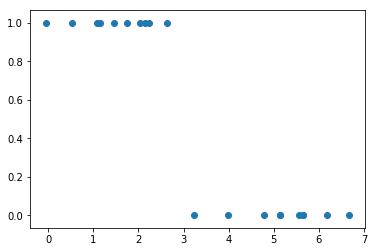

In [7]:
x_label0 = np.random.normal(5, 1, 10)                                      
x_label1 = np.random.normal(2, 1, 10)   

xs = np.append(x_label0, x_label1)                                         

labels = [0.] * len(x_label0) + [1.] * len(x_label1)                       

plt.scatter(xs, labels)

In [6]:
labels

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [10]:
len(labels)

20

In [4]:
x_label0

array([3.62833403, 5.24985937, 4.84706344, 6.52039912, 6.29809802,
       4.21038059, 5.52976224, 4.70639422, 5.16821676, 5.20060623])

In [5]:
x_label1

array([1.87087819, 0.61085794, 2.60143949, 1.79718496, 2.16583246,
       2.7737093 , 3.78065916, 0.05975945, 0.60452813, 1.1892319 ])

In [3]:
xs

array([3.62833403, 5.24985937, 4.84706344, 6.52039912, 6.29809802,
       4.21038059, 5.52976224, 4.70639422, 5.16821676, 5.20060623,
       1.87087819, 0.61085794, 2.60143949, 1.79718496, 2.16583246,
       2.7737093 , 3.78065916, 0.05975945, 0.60452813, 1.1892319 ])

In [8]:
learning_rate = 0.001                                                      
training_epochs = 1000                                                     

graph = tf.Graph()
with graph.as_default():

    X = tf.placeholder("float")                                                
    Y = tf.placeholder("float")                                                

    def model(X, w):                                                           
        return tf.add(tf.multiply(w[1], tf.pow(X, 1)), tf.multiply(w[0], tf.pow(X, 0)))                         

    w = tf.Variable([0., 0.], name="parameters")

    y_model = model(X, w)

    cost = tf.reduce_sum(tf.square(Y-y_model))                                 

    train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
    
    init = tf.global_variables_initializer()

In [13]:
sess = tf.Session(graph=graph)                                  
sess.run(init)                                                   

for epoch in range(training_epochs):                             
    sess.run(train_op, feed_dict={X: xs, Y: labels})             
    current_cost = sess.run(cost, feed_dict={X: xs, Y: labels})  
    
    if epoch % 100 == 0:
        print(epoch, current_cost)                               

w_val = sess.run(w)                                              
print('learned parameters', w_val)                               

sess.close()

0 9.067268
100 1.9149761
200 1.0431252
300 0.9351905
400 0.92182815
500 0.9201739
600 0.9199691
700 0.9199438
800 0.9199407
900 0.91994023
learned parameters [ 1.2383826  -0.22062513]


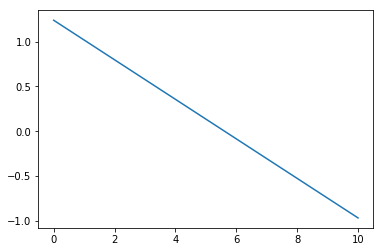

In [12]:
all_xs = np.linspace(0, 10, 100)                                 
plt.plot(all_xs, all_xs * w_val[1] + w_val[0])                     
plt.show()

In [14]:
sess = tf.Session(graph=graph)                                  
sess.run(init) 

correct_prediction = tf.equal(Y, tf.to_float(tf.greater(y_model, 0.5)))  
# When the model’s response is greater than 0.5, it should be a positive label, and vice versa.
accuracy = tf.reduce_mean(tf.to_float(correct_prediction))         
# Computes the percent of success

print('accuracy', sess.run(accuracy, feed_dict={X: xs, Y: labels}))
# Prints the success measure from provided input

sess.close()

accuracy 0.5


### USING LOGISTIC REGRESSION

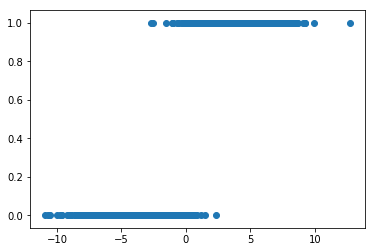

In [16]:
learning_rate = 0.01                                        
training_epochs = 1000                                                     

def sigmoid(x):                                                            
    return 1. / (1. + np.exp(-x))                                          

x1 = np.random.normal(-4, 2, 1000)                                         
x2 = np.random.normal(4, 2, 1000)                                          
xs = np.append(x1, x2)                                                     
ys = np.asarray([0.] * len(x1) + [1.] * len(x2))                           

plt.scatter(xs, ys)                                                        

In [25]:
x1.shape

(1000,)

In [26]:
x2.shape

(1000,)

In [27]:
xs.shape

(2000,)

In [28]:
ys.shape

(2000,)

In [18]:
graph = tf.Graph()
with graph.as_default():
    X = tf.placeholder(tf.float32, shape=(None,), name="x")                    
    Y = tf.placeholder(tf.float32, shape=(None,), name="y")                    
    w = tf.Variable([0., 0.], name="parameter", trainable=True)                
    y_model = tf.sigmoid(w[1] * X + w[0])                                      
    
    cost = tf.reduce_mean(-Y * tf.log(y_model) - (1 - Y) * tf.log(1 - y_model))

    train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

In [32]:
with tf.Session(graph=graph) as sess:                                                 
    sess.run(tf.global_variables_initializer())                            
    prev_err = 0                                                           
    
    for epoch in range(training_epochs):                                   
        _, err = sess.run([ train_op, cost], {X: xs, Y: ys})                
        
        print(epoch, err)
        
        if abs(prev_err - err) < 0.0001:                                   
            break
        prev_err = err
        
    w_val = sess.run(w, {X: xs, Y: ys})                                    


0 0.6931461
1 0.6538782
2 0.61846274
3 0.58649474
4 0.5575968
5 0.53142446
6 0.5076684
7 0.48605254
8 0.4663337
9 0.44829738
10 0.4317561
11 0.41654548
12 0.4025217
13 0.38955945
14 0.37754846
15 0.36639243
16 0.35600665
17 0.34631655
18 0.33725652
19 0.32876846
20 0.3208009
21 0.31330812
22 0.30624932
23 0.2995884
24 0.2932927
25 0.2873332
26 0.28168362
27 0.2763204
28 0.27122223
29 0.26636988
30 0.26174572
31 0.25733405
32 0.25312036
33 0.24909139
34 0.24523509
35 0.2415405
36 0.23799744
37 0.23459665
38 0.23132959
39 0.22818826
40 0.22516547
41 0.22225448
42 0.21944907
43 0.21674344
44 0.2141323
45 0.21161051
46 0.20917359
47 0.20681715
48 0.20453711
49 0.20232977
50 0.20019156
51 0.1981193
52 0.19610977
53 0.1941602
54 0.19226767
55 0.1904298
56 0.18864411
57 0.18690838
58 0.18522039
59 0.18357822
60 0.18197994
61 0.1804237
62 0.17890787
63 0.17743076
64 0.175991
65 0.17458698
66 0.1732174
67 0.17188098
68 0.17057647
69 0.16930264
70 0.16805853
71 0.16684291
72 0.16565481
73 0.1644

In [30]:
with tf.Session(graph=graph) as sess:                                                 
    sess.run(tf.global_variables_initializer())                            
    prev_err = 0                                                           
    
    for epoch in range(training_epochs):                                   
        _ = sess.run([train_op], {X: xs, Y: ys})                
        
        err = cost.eval({X: xs, Y: ys})                
        
        print(epoch, err)
        
        if abs(prev_err - err) < 0.0001:                                   
            break
        prev_err = err
        
    w_val = sess.run(w, {X: xs, Y: ys})                                    


0 0.6538782
1 0.61846274
2 0.58649474
3 0.5575968
4 0.53142446
5 0.5076684
6 0.48605254
7 0.4663337
8 0.44829738
9 0.4317561
10 0.41654548
11 0.4025217
12 0.38955945
13 0.37754846
14 0.36639243
15 0.35600665
16 0.34631655
17 0.33725652
18 0.32876846
19 0.3208009
20 0.31330812
21 0.30624932
22 0.2995884
23 0.2932927
24 0.2873332
25 0.28168362
26 0.2763204
27 0.27122223
28 0.26636988
29 0.26174572
30 0.25733405
31 0.25312036
32 0.24909139
33 0.24523509
34 0.2415405
35 0.23799744
36 0.23459665
37 0.23132959
38 0.22818826
39 0.22516547
40 0.22225448
41 0.21944907
42 0.21674344
43 0.2141323
44 0.21161051
45 0.20917359
46 0.20681715
47 0.20453711
48 0.20232977
49 0.20019156
50 0.1981193
51 0.19610977
52 0.1941602
53 0.19226767
54 0.1904298
55 0.18864411
56 0.18690838
57 0.18522039
58 0.18357822
59 0.18197994
60 0.1804237
61 0.17890787
62 0.17743076
63 0.175991
64 0.17458698
65 0.1732174
66 0.17188098
67 0.17057647
68 0.16930264
69 0.16805853
70 0.16684291
71 0.16565481
72 0.16449338
73 0.163

In [19]:
with tf.Session(graph=graph) as sess:                                                 
    sess.run(tf.global_variables_initializer())                            
    prev_err = 0                                                           
    
    for epoch in range(training_epochs):                                   
        err, _ = sess.run([cost, train_op], {X: xs, Y: ys})                
        print(epoch, err)
        
        if abs(prev_err - err) < 0.0001:                                   
            break
        prev_err = err
        
    w_val = sess.run(w, {X: xs, Y: ys})                                    
    sess.close()     

0 0.6931461
1 0.6538782
2 0.61846274
3 0.58649474
4 0.5575968
5 0.53142446
6 0.5076684
7 0.48605254
8 0.4663337
9 0.44829738
10 0.4317561
11 0.41654548
12 0.4025217
13 0.38955945
14 0.37754846
15 0.36639243
16 0.35600665
17 0.34631655
18 0.33725652
19 0.32876846
20 0.3208009
21 0.31330812
22 0.30624932
23 0.2995884
24 0.2932927
25 0.2873332
26 0.28168362
27 0.2763204
28 0.27122223
29 0.26636988
30 0.26174572
31 0.25733405
32 0.25312036
33 0.24909139
34 0.24523509
35 0.2415405
36 0.23799744
37 0.23459665
38 0.23132959
39 0.22818826
40 0.22516547
41 0.22225448
42 0.21944907
43 0.21674344
44 0.2141323
45 0.21161051
46 0.20917359
47 0.20681715
48 0.20453711
49 0.20232977
50 0.20019156
51 0.1981193
52 0.19610977
53 0.1941602
54 0.19226767
55 0.1904298
56 0.18864411
57 0.18690838
58 0.18522039
59 0.18357822
60 0.18197994
61 0.1804237
62 0.17890787
63 0.17743076
64 0.175991
65 0.17458698
66 0.1732174
67 0.17188098
68 0.17057647
69 0.16930264
70 0.16805853
71 0.16684291
72 0.16565481
73 0.1644

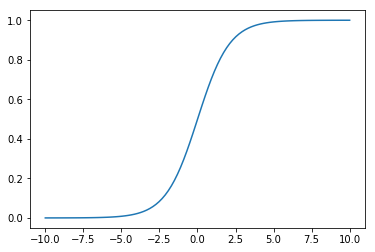

In [20]:
all_xs = np.linspace(-10, 10, 100)                                         
plt.plot(all_xs, sigmoid((all_xs * w_val[1] + w_val[0])))                  
plt.show()

In [21]:
all_xs

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [33]:
all_xs.shape

(100,)

In [22]:
w_val

array([-0.00648919,  0.9534161 ], dtype=float32)

### Solving two-dimensional logistic regression


In [34]:
learning_rate = 0.1                                                  
training_epochs = 2000                                               

def sigmoid(x):                                                      
    return 1. / (1. + np.exp(-x))

In [35]:
# Initializes fake data
x1_label1 = np.random.normal(3, 1, 1000)                             
x2_label1 = np.random.normal(2, 1, 1000)                             
x1_label2 = np.random.normal(7, 1, 1000)                             
x2_label2 = np.random.normal(6, 1, 1000)                             

x1s = np.append(x1_label1, x1_label2)                                
x2s = np.append(x2_label1, x2_label2)                                
ys = np.asarray([0.] * len(x1_label1) + [1.] * len(x1_label2))       

In [36]:
x1_label1.shape

(1000,)

In [38]:
x1_label1[:10]

array([3.05953856, 2.48576679, 4.06636642, 3.13539592, 3.51828927,
       3.9896551 , 2.99476962, 3.9503954 , 2.26270083, 3.10579186])

In [37]:
x2_label1.shape

(1000,)

In [39]:
x2_label1[:10]

array([1.42618039, 2.68719293, 2.6611576 , 0.82303864, 1.89559091,
       0.67156871, 2.39359118, 1.54556205, 2.50795737, 2.53031253])

In [40]:
x1_label2[:10]

array([5.21888262, 5.95408339, 5.97881596, 7.65737522, 6.87982837,
       6.04573056, 7.60117729, 7.60298418, 7.255188  , 8.44988878])

In [41]:
x2_label2[:10]

array([6.10284421, 5.13696452, 5.34845647, 6.76267347, 5.99540638,
       3.39802008, 6.60737638, 5.92941204, 6.15382226, 6.1285469 ])

In [42]:
x1s.shape

(2000,)

In [43]:
x2s.shape

(2000,)

In [44]:
ys

array([0., 0., 0., ..., 1., 1., 1.])

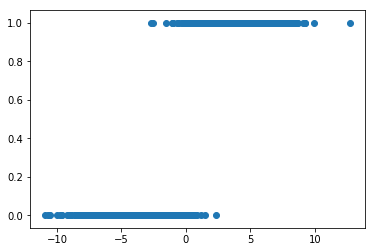

In [45]:
plt.scatter(xs, ys)

In [48]:

graph = tf.Graph()
with graph.as_default():
    
    X1 = tf.placeholder(tf.float32, shape=(None,), name="x1")               
    X2 = tf.placeholder(tf.float32, shape=(None,), name="x2")                  
    Y = tf.placeholder(tf.float32, shape=(None,), name="y")                    

    w = tf.Variable([0., 0., 0.], name="w", trainable=True)                    

    y_model = tf.sigmoid(w[2] * X2 + w[1] * X1 + w[0])                         
    
    cost = tf.reduce_mean(-tf.log(y_model * Y + (1 - y_model) * (1 - Y)))      
    # Creates a new session, initializes variables, and learns parameters until convergence
    train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

with tf.Session(graph=graph) as sess:                                                 
    sess.run(tf.global_variables_initializer())                            
    prev_err = 0                                                           
    for epoch in range(training_epochs):                                   
        err, _ = sess.run([cost, train_op], {X1: x1s, X2: x2s, Y: ys})     
        print(epoch, err)                                                  
        if abs(prev_err - err) < 0.0001:                                   
            break                                                          
        prev_err = err                                                  
    w_val = sess.run(w)   

0 0.6931461
1 0.6099921
2 0.6032781
3 0.5984899
4 0.5938303
5 0.58928514
6 0.5848502
7 0.58052075
8 0.57629263
9 0.5721621
10 0.5681249
11 0.5641776
12 0.5603165
13 0.5565383
14 0.5528396
15 0.5492175
16 0.5456691
17 0.54219127
18 0.53878164
19 0.53543746
20 0.53215635
21 0.5289359
22 0.52577406
23 0.5226683
24 0.51961696
25 0.516618
26 0.5136695
27 0.5107699
28 0.5079172
29 0.50511
30 0.5023467
31 0.49962586
32 0.49694616
33 0.49430615
34 0.4917046
35 0.48914036
36 0.486612
37 0.48411876
38 0.48165935
39 0.47923294
40 0.47683844
41 0.47447494
42 0.47214147
43 0.4698373
44 0.46756154
45 0.4653136
46 0.4630926
47 0.4608976
48 0.45872825
49 0.45658374
50 0.45446357
51 0.45236692
52 0.45029336
53 0.4482424
54 0.44621325
55 0.4442057
56 0.44221905
57 0.4402529
58 0.43830678
59 0.43638018
60 0.43447286
61 0.43258423
62 0.43071404
63 0.4288619
64 0.4270273
65 0.42521003
66 0.42340967
67 0.42162588
68 0.41985846
69 0.41810706
70 0.41637132
71 0.41465098
72 0.41294578
73 0.41125548
74 0.409579

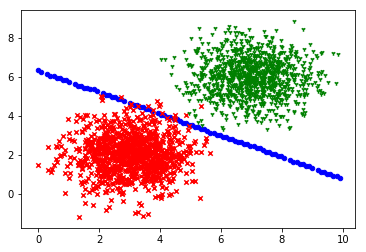

In [49]:
# Defines arrays to hold boundary points
x1_boundary, x2_boundary = [], []                                          
for x1_test in np.linspace(0, 10, 100):                                    
    for x2_test in np.linspace(0, 10, 100):                                
        z = sigmoid(-x2_test*w_val[2] - x1_test*w_val[1] - w_val[0])       
        # If the model response is close the 0.5, updates the boundary points
        if abs(z - 0.5) < 0.01:                                            
            x1_boundary.append(x1_test)                                    
            x2_boundary.append(x2_test)                                    

plt.scatter(x1_boundary, x2_boundary, c='b', marker='o', s=20)             
plt.scatter(x1_label1, x2_label1, c='r', marker='x', s=20)                 
plt.scatter(x1_label2, x2_label2, c='g', marker='1', s=20)                 
                                                                           
plt.show()
# A crime that occurs on this line has an equal chance of being committed by either gang.

### MULTICLASS CLASSIFIER

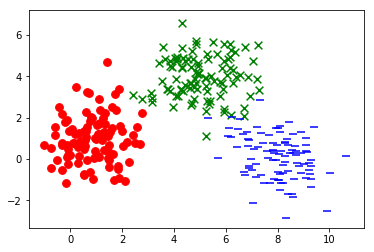

In [50]:
x1_label0 = np.random.normal(1, 1, (100, 1))                   
x2_label0 = np.random.normal(1, 1, (100, 1))

x1_label1 = np.random.normal(5, 1, (100, 1))                        
x2_label1 = np.random.normal(4, 1, (100, 1))                        

x1_label2 = np.random.normal(8, 1, (100, 1))                        
x2_label2 = np.random.normal(0, 1, (100, 1))                        

plt.scatter(x1_label0, x2_label0, c='r', marker='o', s=60)          
plt.scatter(x1_label1, x2_label1, c='g', marker='x', s=60)          
plt.scatter(x1_label2, x2_label2, c='b', marker='_', s=60)          
plt.show()

In [51]:
xs_label0 = np.hstack((x1_label0, x2_label0))                              
xs_label1 = np.hstack((x1_label1, x2_label1))                              
xs_label2 = np.hstack((x1_label2, x2_label2))                              
xs = np.vstack((xs_label0, xs_label1, xs_label2))                      

labels = np.matrix([[1., 0., 0.]] * len(x1_label0) + [[0., 1., 0.]] * len(x1_label1) + [[0., 0., 1.]] * len(x1_label2))                     

arr = np.arange(xs.shape[0])                                               
np.random.shuffle(arr)                                                     
xs = xs[arr, :]                                                            
labels = labels[arr, :]                                                    

test_x1_label0 = np.random.normal(1, 1, (10, 1))                           
test_x2_label0 = np.random.normal(1, 1, (10, 1))                           

test_x1_label1 = np.random.normal(5, 1, (10, 1))                           
test_x2_label1 = np.random.normal(4, 1, (10, 1))                           

test_x1_label2 = np.random.normal(8, 1, (10, 1))                           
test_x2_label2 = np.random.normal(0, 1, (10, 1))

test_xs_label0 = np.hstack((test_x1_label0, test_x2_label0))# [10,1] [10, 1] == [10,2]
test_xs_label1 = np.hstack((test_x1_label1, test_x2_label1))               
test_xs_label2 = np.hstack((test_x1_label2, test_x2_label2))               

test_xs = np.vstack((test_xs_label0, test_xs_label1, test_xs_label2))   # [10,1] [10, 1] == [20,1]
test_labels = np.matrix([[1., 0., 0.]] * 10 + [[0., 1., 0.]] * 10 + [[0., 0., 1.]] * 10)                                                            

train_size, num_features = xs.shape                                        

In [53]:
xs.shape

(300, 2)

In [56]:
test_xs_label0

array([[ 1.07783778,  2.27762994],
       [ 0.16518777,  3.01827748],
       [ 2.74782533,  1.48928968],
       [ 2.40657113,  0.36901853],
       [-0.53757712,  1.96346283],
       [ 0.58213378,  1.57038245],
       [ 1.1071501 ,  2.29098474],
       [-0.7187229 ,  3.39376054],
       [ 1.04411528,  0.04208217],
       [ 0.32993921,  0.17881128]])

In [58]:
test_x1_label2.shape

(10, 1)

In [59]:
test_x2_label0.shape

(10, 1)

In [60]:
test_x1_label0.shape

(10, 1)

In [61]:
test_xs_label0.shape

(10, 2)

In [67]:
xs.shape

(300, 2)

In [73]:
xs[:10,:]

array([[ 6.16149182,  5.56495714],
       [ 7.96767563,  0.66420129],
       [-0.12906564,  0.69128902],
       [ 1.73102229,  3.12563417],
       [ 4.61516912,  3.46308817],
       [ 6.20509921,  5.25457354],
       [ 6.0702285 ,  4.84585951],
       [ 2.76308596,  2.21538471],
       [ 4.29554327,  5.38352041],
       [ 6.56370507,  1.93687031]])

In [69]:
labels.shape

(300, 3)

In [70]:
test_xs.shape

(30, 2)

In [71]:
test_labels.shape

(30, 3)

In [64]:
learning_rate = 0.01                                                       
training_epochs = 1000                                                     
num_labels = 3                                                             
batch_size = 100      

In [74]:
                                                     
graph = tf.Graph()
with graph.as_default():
    X = tf.placeholder("float", shape=[None, num_features], name="X")                    
    Y = tf.placeholder("float", shape=[None, num_labels], name="Y")                      

    W = tf.Variable(tf.zeros([num_features, num_labels]))                      
    b = tf.Variable(tf.zeros([num_labels]))                                    
    y_model = tf.nn.softmax(tf.matmul(X, W) + b)  # np.dot(X,W) + b                             

    
    cost = -tf.reduce_sum(Y * tf.log(y_model))                                 
    train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
    
    
    correct_prediction = tf.equal(tf.argmax(y_model, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))   
    
    saver = tf.train.Saver()

In [75]:
with tf.Session(graph=graph) as sess:      
    
    tf.global_variables_initializer().run()           
                                                                            
    for step in range(training_epochs * train_size // batch_size):          
        offset = (step * batch_size) % train_size                           
        batch_xs = xs[offset:(offset + batch_size), :]                      
        batch_labels = labels[offset:(offset + batch_size)]                 
        
        err, _ = sess.run([cost, train_op], feed_dict={X: batch_xs, Y: batch_labels})                                                         
        print (step, err)                                                   
                                                                            
    W_val = sess.run(W)     
    print('w', W_val)                                                     
    b_val = sess.run(b)                                                     
    print('b', b_val)
    
    print("accuracy", accuracy.eval(feed_dict={X: test_xs, Y: test_labels}))
    
    saver.save(sess, "./my_multiclass_model_tf")

0 109.86121
1 187.52016
2 386.51697
3 375.5105
4 124.14308
5 128.6689
6 129.61914
7 86.420456
8 55.831482
9 27.193941
10 26.574615
11 28.58428
12 27.205297
13 20.831512
14 24.173733
15 24.478416
16 19.458494
17 22.28769
18 21.698946
19 17.440027
20 18.739307
21 19.665241
22 16.303467
23 17.15763
24 18.032127
25 14.993382
26 15.320306
27 16.755556
28 14.438579
29 14.203995
30 15.600529
31 13.817435
32 13.140869
33 14.660168
34 13.392907
35 12.310914
36 13.836125
37 13.011569
38 11.595252
39 13.135495
40 12.694734
41 10.995156
42 12.528588
43 12.417825
44 10.4829
45 12.003236
46 12.17465
47 10.044167
48 11.54606
49 11.9576645
50 9.665158
51 11.146957
52 11.762331
53 9.335267
54 10.797206
55 11.585154
56 9.045753
57 10.489506
58 11.423645
59 8.789599
60 10.217665
61 11.2759
62 8.561133
63 9.976442
64 11.140435
65 8.355782
66 9.761404
67 11.016031
68 8.169836
69 9.568819
70 10.901653
71 8.000285
72 9.395544
73 10.796398
74 7.844675
75 9.238939
76 10.699468
77 7.7009945
78 9.096788
79 10.61

In [80]:
with tf.Session(graph=graph) as sess:
    saver.restore(sess, "./my_multiclass_model_tf")
    # make the prediction:
    y_model_val = y_model.eval(feed_dict={X: test_xs})

INFO:tensorflow:Restoring parameters from ./my_multiclass_model_tf


In [76]:
test_xs.shape

(30, 2)

In [81]:
y_model_val

array([[9.98320282e-01, 1.67959288e-03, 1.26325617e-07],
       [9.99832153e-01, 1.67828679e-04, 2.01306430e-10],
       [7.78468549e-01, 2.17619643e-01, 3.91184399e-03],
       [9.78757799e-01, 1.27178105e-02, 8.52444954e-03],
       [9.99997854e-01, 2.18457694e-06, 4.40547078e-11],
       [9.99916553e-01, 8.33903687e-05, 4.00737399e-08],
       [9.98082399e-01, 1.91746966e-03, 1.43581289e-07],
       [9.99989510e-01, 1.04947258e-05, 8.09440622e-13],
       [9.99944687e-01, 4.33162895e-05, 1.20299101e-05],
       [9.99996185e-01, 3.54476288e-06, 1.98553536e-07],
       [2.22747531e-07, 9.99992847e-01, 6.92043113e-06],
       [6.13665245e-02, 9.38621342e-01, 1.22253086e-05],
       [1.15591218e-04, 9.99829412e-01, 5.49730721e-05],
       [1.31272545e-05, 9.99741495e-01, 2.45334668e-04],
       [8.91618038e-06, 9.99947309e-01, 4.37754570e-05],
       [3.66069656e-07, 9.99444187e-01, 5.55397419e-04],
       [7.31738012e-08, 9.99999166e-01, 7.04185254e-07],
       [2.31570339e-05, 9.99976

In [82]:
y_model_val.shape

(30, 3)